## Model Selection

Para la elaboración del dataset hemos trabajado sobre numerosos estudios y recogido información de fuentes tanto nacionales como internacionales, utilizándolas de base a la hora de establecer las características que más influyen sobre el estado final de soledad o dependencia de la población envejecida. 

Algunas de las fuentes a destacar son las aportaciones del **Instituto Nacional de Estadística** del estado español o **EUSTAT** a nivel provincial

In [1]:
from librerias import *

In [2]:
#semilla y establecer numero de registros
semilla = 5001
num_valores = 5001

random.seed(semilla)

#parámetros y posibles estados del individuo
edades = list(range(40, 101))
estados_civiles = ['casado', 'divorciado', 'separado', 'viudo', 'soltero']
sexos = ['hombre', 'mujer']
niveles_estudios = ['sin estudios', 'primarios', 'secundarios', 'superiores']
psicofarmacos = ['ansioliticos', 'antidepresivos', 'otros']
vive_solo = ['si', 'no']
hijos = ['si', 'no']
ascensor = ['si', 'no']
act_fisica = ['sedentario', 'moderado', 'activo', 'muy activo']
lim_fisica = ['nada limitado', 'limitado no grave', 'limitado grave']
estado_animo = ['animo_bajo', 'animo_medio', 'animo_alto']
satisfaccion_vida = ['poco satisfecho', 'satisfecho medio', 'muy satisfecho']
ingresos_economicos = ['ingresos_bajos', 'ingresos_medios', 'ingresos_altos']
red_apoyo_familiar = ['sin red', 'red: 1 a 5', 'red: mas de 5']
cohesion_social = ['baja cohesion', 'alta cohesion']
municipio_accesible = ['poco accesible', 'medio_accesible', 'accesibilidad alta']
municipio_rec_social = ['rec social bajo', 'rec social medio', 'rec social alto']
municipio_rec_ocio = ['rec ocio bajo', 'rec ocio medio', 'rec ocio alto']

#diccionario con random, introduciendo respuestas posibles para cada atributo y así generalizar entre las diferentes posibilidades
individuos = []
for _ in range(num_valores):
    individuo = {
        'edad': random.choice(edades),
        'estado_civil': random.choice(estados_civiles),
        'sexo': random.choice(sexos),
        'nivel_estudios': random.choice(niveles_estudios),
        'psicofarmacos': random.choice(psicofarmacos),
        'vive_solo': random.choice(vive_solo),
        'hijos': random.choice(hijos),
        'ascensor': random.choice(ascensor),
        'act_fisica': random.choice(act_fisica),
        'lim_fisica': random.choice(lim_fisica),
        'estado_animo': random.choice(estado_animo),
        'satisfaccion_vida': random.choice(satisfaccion_vida),
        'ingresos_economicos': random.choice(ingresos_economicos),
        'red_apoyo_familiar': random.choice(red_apoyo_familiar),
        'cohesion_social': random.choice(cohesion_social),
        'municipio_accesible': random.choice(municipio_accesible),
        'municipio_rec_social': random.choice(municipio_rec_social),
        'municipio_rec_ocio': random.choice(municipio_rec_ocio)}
    individuos.append(individuo)

df = pd.DataFrame(individuos)

A continuación se establece un valor numérico para cada posible elección en cada parámetro del dataset, en función de la relación que tiene esa característica con el objetivo a predecir (nivel de soledad)

In [3]:
def mapear_edad(edad):
    if edad > 95: 
        return 6
    elif 65 <= edad <= 69:
        return 5
    elif 90 <= edad <= 95:
        return 4
    elif 70 <= edad <= 74:
        return 3
    elif 80 <= edad <= 84:
        return 3
    elif 75 <= edad <= 79:
        return 2
    elif 85 <= edad <= 89:
        return 1
    elif 50 <= edad <= 64:
        return 0
    elif 40 <= edad <= 49:
        return 0

mapeo_estado_civil = {
    'viudo': 4,
    'soltero': 2,
    'separado': 1,
    'divorciado': 1,
    'casado': 0}

mapeo_sexos = {
    'hombre': 1,
    'mujer': 3}

mapeo_niveles_estudios = {
    'sin estudios': 4,
    'primarios': 2,
    'secundarios': 1,
    'superiores': 0}

mapeo_psicofarmacos = {
    'ansioliticos': 2,
    'antidepresivos': 1,
    'otros': 1}

mapeo_vive_solo = {
    'si': 3,
    'no': 1}

mapeo_hijos = {
    'si': 0,
    'no': 2}

mapeo_ascensor = {
    'si': 0,
    'no': 2}

mapeo_act_fisica = {
    'sedentario': 4,
    'moderado': 3,
    'activo': 1,
    'muy activo': 0}

mapeo_lim_fisica = {
    'nada limitado': 0,
    'limitado no grave': 2,
    'limitado grave': 4}

mapeo_estado_animo = {
    'animo_bajo': 3,
    'animo_medio': 1,
    'animo_alto': 0}

mapeo_satisfaccion_vida = {
    'poco satisfecho': 4,
    'satisfecho medio': 2,
    'muy satisfecho': 0}

mapeo_ingresos_economicos = {
    'ingresos_bajos': 4,
    'ingresos_medios': 2,
    'ingresos_altos': 0}

mapeo_red_apoyo_familiar = {
    'sin red': 4,
    'red: 1 a 5': 2,
    'red: mas de 5': 0}

mapeo_cohesion_social = {
    'baja cohesion': 1,
    'alta cohesion': 0}

mapeo_municipio_accesible = {
    'poco accesible': 3,
    'medio_accesible': 1,
    'accesibilidad alta': 0}

mapeo_municipio_rec_social = {
    'rec social bajo': 3,
    'rec social medio': 1,
    'rec social alto': 0}

mapeo_municipio_rec_ocio = {
    'rec ocio bajo': 3,
    'rec ocio medio': 1,
    'rec ocio alto': 0}

In [4]:
#aplicar a cada columna de mi dataframe

df['edad'] = df['edad'].apply(mapear_edad)
df['estado_civil'] = df['estado_civil'].replace(mapeo_estado_civil)
df['sexo'] = df['sexo'].replace(mapeo_sexos)
df['nivel_estudios'] = df['nivel_estudios'].replace(mapeo_niveles_estudios)
df['psicofarmacos'] = df['psicofarmacos'].replace(mapeo_psicofarmacos)
df['vive_solo'] = df['vive_solo'].replace(mapeo_vive_solo)
df['hijos'] = df['hijos'].replace(mapeo_hijos)
df['ascensor'] = df['ascensor'].replace(mapeo_ascensor)
df['act_fisica'] = df['act_fisica'].replace(mapeo_act_fisica)
df['lim_fisica'] = df['lim_fisica'].replace(mapeo_lim_fisica)
df['estado_animo'] = df['estado_animo'].replace(mapeo_estado_animo)
df['satisfaccion_vida'] = df['satisfaccion_vida'].replace(mapeo_satisfaccion_vida)
df['ingresos_economicos'] = df['ingresos_economicos'].replace(mapeo_ingresos_economicos)
df['red_apoyo_familiar'] = df['red_apoyo_familiar'].replace(mapeo_red_apoyo_familiar)
df['cohesion_social'] = df['cohesion_social'].replace(mapeo_cohesion_social)
df['municipio_accesible'] = df['municipio_accesible'].replace(mapeo_municipio_accesible)
df['municipio_rec_social'] = df['municipio_rec_social'].replace(mapeo_municipio_rec_social)
df['municipio_rec_ocio'] = df['municipio_rec_ocio'].replace(mapeo_municipio_rec_ocio)

In [5]:
#creamos una nueva columna (target) nivel_soledad: crear variable intermedia (valor)  
valor = df.sum(axis=1)

#obtenemos el valor máximo y mínimo de la columna 'Valor'
valor_maximo = valor.max()
valor_minimo = valor.min()
print(valor_maximo)
print (valor_minimo)

50
10


In [6]:
#definimos los límites de los rangos para clasificar Nivel_soledad (target)
rango_1 = valor_maximo / 3
rango_2 = 2 * valor_maximo / 3

#aplicar el mapeo a la columna 'Nivel_soledad' basado en los rangos
df['Nivel_soledad'] = pd.cut(valor, bins=[-np.inf, rango_1, rango_2, np.inf], labels=[0, 1, 2], right=False).astype('int64')

df.head()

,edad,estado_civil,sexo,nivel_estudios,psicofarmacos,vive_solo,hijos,ascensor,act_fisica,lim_fisica,estado_animo,satisfaccion_vida,ingresos_economicos,red_apoyo_familiar,cohesion_social,municipio_accesible,municipio_rec_social,municipio_rec_ocio,Nivel_soledad
0,2,1,3,4,2,3,0,2,0,2,0,0,4,2,0,3,1,0,1
1,4,2,3,2,1,3,2,0,1,2,1,2,0,2,1,1,0,3,1
2,1,4,1,2,1,1,0,2,0,2,1,2,0,4,1,3,0,1,1
3,0,4,3,0,2,1,2,0,0,4,3,2,2,0,0,1,1,1,1
4,4,1,1,0,1,3,2,2,4,2,3,4,2,4,1,1,1,0,2


Así queda el dataset puramente numérico que emplearemos para el aprendizaje automático de nuestro modelo, exportamos y revisamos sus valores y su potencial:

In [ ]:
#exportar
output_path = "df_soledad_DEF.csv"
df.to_csv(output_path, index=False)

In [7]:
#informe por feature
def data_report(df):
    #nombres de columnas
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    #tipos de los valores de cada una de mis columnas
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    #sacamos missing, por procedimiento. pero sabemos que no tenemos
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    #valores únicos, por procedimiento
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)
    return concatenado.T

#sacamos reporte        
data_report(df)

COL_N,edad,estado_civil,sexo,nivel_estudios,psicofarmacos,vive_solo,hijos,ascensor,act_fisica,lim_fisica,estado_animo,satisfaccion_vida,ingresos_economicos,red_apoyo_familiar,cohesion_social,municipio_accesible,municipio_rec_social,municipio_rec_ocio,Nivel_soledad
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
MISSINGS (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
UNIQUE_VALUES,7,4,2,4,2,2,2,2,4,3,3,3,3,3,2,3,3,3,3
CARDIN (%),0.14,0.08,0.04,0.08,0.04,0.04,0.04,0.04,0.08,0.06,0.06,0.06,0.06,0.06,0.04,0.06,0.06,0.06,0.06


In [8]:
#estadísticas
df.describe()

,edad,estado_civil,sexo,nivel_estudios,psicofarmacos,vive_solo,hijos,ascensor,act_fisica,lim_fisica,estado_animo,satisfaccion_vida,ingresos_economicos,red_apoyo_familiar,cohesion_social,municipio_accesible,municipio_rec_social,municipio_rec_ocio,Nivel_soledad
count,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00
mean,1.99,1.56,2.03,1.75,1.34,2.01,1.01,1.00,2.04,1.98,1.32,1.99,1.96,2.00,0.50,1.33,1.34,1.33,1.17
std,2.07,1.34,1.00,1.47,0.47,1.00,1.00,1.00,1.58,1.65,1.24,1.62,1.63,1.63,0.50,1.25,1.25,1.25,0.41
min,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2.00,1.00,3.00,2.00,1.00,3.00,2.00,2.00,3.00,2.00,1.00,2.00,2.00,2.00,0.00,1.00,1.00,1.00,1.00
75%,4.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,4.00,4.00,3.00,4.00,4.00,4.00,1.00,3.00,3.00,3.00,1.00
max,6.00,4.00,3.00,4.00,2.00,3.00,2.00,2.00,4.00,4.00,3.00,4.00,4.00,4.00,1.00,3.00,3.00,3.00,2.00


In [10]:
#tipos + missing values (no hay)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   edad                  5001 non-null   int64
 1   estado_civil          5001 non-null   int64
 2   sexo                  5001 non-null   int64
 3   nivel_estudios        5001 non-null   int64
 4   psicofarmacos         5001 non-null   int64
 5   vive_solo             5001 non-null   int64
 6   hijos                 5001 non-null   int64
 7   ascensor              5001 non-null   int64
 8   act_fisica            5001 non-null   int64
 9   lim_fisica            5001 non-null   int64
 10  estado_animo          5001 non-null   int64
 11  satisfaccion_vida     5001 non-null   int64
 12  ingresos_economicos   5001 non-null   int64
 13  red_apoyo_familiar    5001 non-null   int64
 14  cohesion_social       5001 non-null   int64
 15  municipio_accesible   5001 non-null   int64
 16  munici

In [12]:
#dimensiones del dataset
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 5001
Columnas: 19


Para este proyecto conjunto con las diferentes verticales, hemos hecho de nuestro dataset un archivo exportable a bases de datos, empleando librería y software de *SQLite Studio*. Hemos empleado una única tabla con la recogida de datos previamente mencionada, esa tabla la hemos trabajado de forma conjunta con el equipo de *full-stack* y a través de ella hemos realizado llamadas a una API creada por nosotros mismos y alojada en la web, para que el modelo predictivo funcionara de manera remota.

In [14]:
import sqlite3
#importamos la librería de python equivalente a SQLite Studio

In [16]:
#conectar a la base de datos
conn = sqlite3.connect('dbdesafio_DEF.sql')

#crear un cursor para ejecutar comandos SQL
cursor = conn.cursor()

#creamos nuestra única tabla con cada columna
create_table_query = '''
CREATE TABLE IF NOT EXISTS datos (
    id INTEGER PRIMARY KEY,
    edad INTEGER,
    estado_civil TEXT,
    sexo TEXT,
    nivel_estudios TEXT,
    psicofarmacos TEXT,
    vive_solo TEXT,
    hijos TEXT,
    ingresos_economicos TEXT,
    red_apoyo_familiar TEXT,
    ascensor TEXT,
    act_fisica TEXT,
    lim_fisica TEXT,
    estado_animo TEXT,
    satisfaccion_vida TEXT,
    cohesion_social TEXT,
    municipio_accesible TEXT,
    municipio_rec_social TEXT,
    municipio_rec_ocio TEXT,
    valor_soledad TEXT
);
'''

#exportar la tabla como archivo .sql, para que pueda trabajarla full-stack
output_file = 'datos.sql'
with open(output_file, 'w', encoding='utf-8') as f:
    # Crear la tabla en la base de datos
    cursor.execute(create_table_query)

    #leer datos de mi csv previamente creado
    df = pd.read_csv('./data/df_soledad_DEF.csv')

    #insertar los datos de mi df en mi db
    df.to_sql('datos', conn, if_exists='replace', index=False)

    #obtenemos el esquema de la tabla que queremos y con un bucle vamos agregando
    cursor.execute("SELECT sql FROM sqlite_master WHERE type='table' AND name='datos'")
    row = cursor.fetchone()
    if row is not None:
        table_schema = row[0]

        #aplicamos el esquema de la tabla en el archivo .sql
        f.write(f'{table_schema};\n')

        #obtenemos los datos de la tabla
        cursor.execute("SELECT * FROM datos")
        rows = cursor.fetchall()

        #generamos las sentencias INSERT para los datos
        for row in rows:
            values = ','.join([f"'{str(value)}'" for value in row])
            insert_statement = f"INSERT INTO datos VALUES ({values});\n"
            f.write(insert_statement)

#cerramos conexión
conn.close()


### Machine Learning

In [17]:
#establecemos X (atributos) e Y (target)
X = df.drop('Nivel_soledad', axis=1)
y = df['Nivel_soledad']

#info
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (5001, 18)
Dimensiones de y: (5001,)


Dividimos entre train y test mi dataset para entreno:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (4000, 18)
Tamaño de X_test: (1001, 18)
Tamaño de y_train: (4000,)
Tamaño de y_test: (1001,)


Para esta problemática hemos establecido el tipo de modelo preferido como un modelo de clasificación multiclase, dado que nuestro objetivo a predecir puede ser uno de tres valores, dependiendo del riesgo de soledad en el que se encuentre el individuo en función de la parametrización previamente comentada. 

Para encontrar el modelo que mejor se adapte a nuestro problema de clasificación, pusimos en marcha la herramienta y librería *lazypredict*, que más tarde ajustaríamos según nuestro criterio:

In [19]:
#empleamos la librería
models, predictions = LazyClassifier().fit(X_train, X_test, y_train, y_test)
models = models.sort_values(by='Accuracy', ascending=False)
models

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:12<00:00,  2.40it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,1.00,0.96,None,1.00,0.31
SGDClassifier,1.00,0.92,None,1.00,0.04
LinearSVC,0.99,0.67,None,0.99,0.23
CalibratedClassifierCV,0.99,0.67,None,0.99,0.97
LinearDiscriminantAnalysis,0.99,0.94,None,0.99,2.18
Perceptron,0.98,0.66,None,0.98,0.04
QuadraticDiscriminantAnalysis,0.98,0.78,None,0.98,0.10
SVC,0.98,0.78,None,0.97,0.52
PassiveAggressiveClassifier,0.97,0.64,None,0.97,0.11


Observábamos que todos los modelos conseguían una precisión de acierto bastante alta, encabezando la lista nuestro *Logistic Regression*. Para evaluar esa precisión nos hemos ceñido a la métrica general de **accuracy**, que nos representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos.

In [21]:
# Modelos de clasificación a entrenar
Classifiers_clasif = [
    (LogisticRegression(),
     {"penalty": ["l1", "l2", "elasticnet"],
      "C": [0.001, 0.01, 0.1, 1, 10],
      "solver": ["liblinear", "saga"]}),
    (DecisionTreeClassifier(),
     {"criterion": ["gini", "entropy"],
      "max_depth": [5, 10, None],
      "min_samples_split": [2, 5, 10]}),
    (RandomForestClassifier(),
     {"n_estimators": [10, 100],
      "max_features": [1, 2, 3]}),
    (KNeighborsClassifier(),
     {"n_neighbors": [3, 5, 7],
      "weights": ['uniform', 'distance'],
      "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    (SVC(),
     {"kernel": ['linear', 'rbf', 'sigmoid', 'poly'],
      "C": [0.001, 0.1, 0.5, 1, 5, 10],
      "degree": [1, 2, 3, 4],
      "gamma": ['scale', 'auto']}),
    (GradientBoostingClassifier(),
     {"learning_rate": [0.001, 0.01, 0.1],
      "n_estimators": [50, 100, 200],
      "max_depth": [3, 5, 7],
      "min_samples_split": [2, 5, 10]}),
    (AdaBoostClassifier(),
     {"n_estimators": [50, 100, 200],
      "learning_rate": [0.1, 0.5, 1]}),
    (GaussianNB(), {}),
    (MLPClassifier(), {}),
]


In [23]:
'''

con la siguiente función, hacíamos de forma manual una selección del mejor modelo hacia lo que nos había guiado de alguna forma
lazy predict y obteníamos las métricas de evaluación

'''
def get_best_model_clasif(X_train, y_train, X_test, y_test):
    best_accuracy = -float('inf')
    best_classifier = None
    top_models = []

    for classifier, param in Classifiers_clasif:
        random_search = RandomizedSearchCV(classifier, param_distributions=param, cv=5, n_iter=10,
                                           n_jobs=-1, verbose=False, scoring='accuracy')
        random_search.fit(X_train, y_train)
        accuracy = random_search.best_score_
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_classifier = random_search.best_estimator_
        
        top_models.append((classifier.__class__.__name__, accuracy))  #agregar nombre modelo y precisión

    sorted_models = sorted(top_models, key=lambda x: x[1], reverse=True)  #ordenar los modelos

    print("Top 3 modelos con mejor accuracy:")
    for i in range(3):
        model_name = sorted_models[i][0]
        accuracy = sorted_models[i][1]
        print(f"Modelo: {model_name}, Accuracy: {accuracy:.4f}")

    print(f"\nBest accuracy score: {best_accuracy:.4f}")

    if best_classifier is not None:
        print("Best model Clasificacion:")
        print(best_classifier)
        y_pred = best_classifier.predict(X_test)
        print("Metrics:")
        print(classification_report(y_test, y_pred))

        #establecemos la ruta
        model_path = './model/best_model_clasif.pkl'

        #guardamos
        with open(model_path, 'wb') as file:
            pickle.dump(best_classifier, file)

        print(f"El mejor modelo lo guardo en: {model_path}")
    else:
        print("No se encontró ningún modelo durante la búsqueda.")

    return best_classifier, y_pred

In [24]:
#llamamos a la ruta
best_model, y_pred = get_best_model_clasif(X_train, y_train, X_test, y_test)


Top 3 modelos con mejor accuracy:
Modelo: SVC, Accuracy: 1.0000
Modelo: LogisticRegression, Accuracy: 0.9775
Modelo: MLPClassifier, Accuracy: 0.9490

Best accuracy score: 1.0000
Best model Clasificacion:
SVC(C=5, degree=4, kernel='linear')
Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00       829
           2       1.00      1.00      1.00       163

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

El mejor modelo lo guardo en: ./model/best_model_clasif.pkl


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import pickle

Classifiers_clasif_multi = [
    (LogisticRegression(multi_class='multinomial', solver='saga'),
     {"penalty": ["l1", "l2", "elasticnet"],
      "C": [0.001, 0.01, 0.1, 1, 10]}),
    (DecisionTreeClassifier(),
     {"criterion": ["gini", "entropy"],
      "max_depth": [5, 10, None],
      "min_samples_split": [2, 5, 10]}),
    (RandomForestClassifier(),
     {"n_estimators": [10, 100],
      "max_features": [1, 2, 3]}),
    (GradientBoostingClassifier(),
     {"learning_rate": [0.001, 0.01, 0.1],
      "n_estimators": [50, 100, 200],
      "max_depth": [3, 5, 7],
      "min_samples_split": [2, 5, 10]})
]

def get_best_model_clasif_multi(X_train, y_train, X_test, y_test):
    best_accuracy_multi = -float('inf')
    best_classifier_multi = None
    top_models_multi = []  # Lista para almacenar los mejores modelos

    for classifier, param in Classifiers_clasif_multi:
        random_search = RandomizedSearchCV(classifier, param_distributions=param, cv=5, n_iter=10,
                                           n_jobs=-1, verbose=False, scoring='accuracy')
        random_search.fit(X_train, y_train)
        accuracy_multi = random_search.best_score_

        if accuracy_multi > best_accuracy_multi:
            best_accuracy_multi = accuracy_multi
            best_classifier_multi = random_search.best_estimator_

        top_models_multi.append((classifier.__class__.__name__, accuracy_multi))  # Agregar el nombre del modelo y el accuracy a la lista

    sorted_models_multi = sorted(top_models_multi, key=lambda x: x[1], reverse=True)  # Ordenar los modelos según su accuracy de mayor a menor

    print("Top 3 modelos con mejor accuracy:")
    for i in range(3):
        model_name_multi = sorted_models_multi[i][0]
        accuracy_multi = sorted_models_multi[i][1]
        print(f"Modelo: {model_name_multi}, Accuracy: {accuracy_multi:.4f}")

    print(f"\nBest accuracy score: {best_accuracy_multi:.4f}")

    if best_classifier_multi is not None:
        print("Best model Clasificacion:")
        print(best_classifier_multi)
        y_pred = best_classifier_multi.predict(X_test)
        print("Metrics:")
        print(classification_report(y_test, y_pred))

        # Ruta del archivo para guardar el modelo
        model_path = './model/best_model_clasif_multi.pkl'

        # Guardar el mejor modelo utilizando pickle
        with open(model_path, 'wb') as file:
            pickle.dump(best_classifier_multi, file)

        print(f"Best model saved at {model_path}")
    else:
        print("No se encontró ningún modelo durante la búsqueda.")

    return best_classifier_multi, y_pred


In [30]:
#llamamos a la función y obtenemos el top
best_model_multi, y_pred = get_best_model_clasif_multi(X_train, y_train, X_test, y_test)

Top 3 modelos con mejor accuracy:
Modelo: LogisticRegression, Accuracy: 0.9780
Modelo: GradientBoostingClassifier, Accuracy: 0.9277
Modelo: RandomForestClassifier, Accuracy: 0.8582

Best accuracy score: 0.9780
Best model Clasificacion:
LogisticRegression(C=10, multi_class='multinomial', penalty='l1', solver='saga')
Metrics:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.99      1.00      1.00       829
           2       1.00      0.98      0.99       163

    accuracy                           0.99      1001
   macro avg       1.00      0.81      0.87      1001
weighted avg       0.99      0.99      0.99      1001

Best model saved at ./model/best_model_clasif_multi.pkl


En la siguiente celda analizamos el top de mejores resultados de la métrica *recall*. Llamamos así a la medida que se encarga de analizar cuántos positivos reales han sido correctamente clasificados. Es la medida más interesante para la problemática que se presenta en este proyecto: cuántas personas quiero que me clasifique como solas para combatirlo con urgencia.

In [31]:
from sklearn.metrics import recall_score

Classifiers_clasif_multi = [
    (LogisticRegression(multi_class='multinomial', solver='saga'),
     {"penalty": ["l1", "l2", "elasticnet"],
      "C": [0.001, 0.01, 0.1, 1, 10]}),
    (DecisionTreeClassifier(),
     {"criterion": ["gini", "entropy"],
      "max_depth": [5, 10, None],
      "min_samples_split": [2, 5, 10]}),
    (RandomForestClassifier(),
     {"n_estimators": [10, 100],
      "max_features": [1, 2, 3]}),
    (GradientBoostingClassifier(),
     {"learning_rate": [0.001, 0.01, 0.1],
      "n_estimators": [50, 100, 200],
      "max_depth": [3, 5, 7],
      "min_samples_split": [2, 5, 10]})
]

def get_best_model_clasif_multi(X_train, y_train, X_test, y_test):
    best_recall_multi = -float('inf')
    best_classifier_multi = None
    top_models_multi = []  # Lista para almacenar los mejores modelos

    for classifier, param in Classifiers_clasif_multi:
        random_search = RandomizedSearchCV(classifier, param_distributions=param, cv=5, n_iter=10,
                                           n_jobs=-1, verbose=False, scoring='accuracy')
        random_search.fit(X_train, y_train)
        y_pred = random_search.predict(X_test)
        recall_multi = recall_score(y_test, y_pred, average='weighted')

        if recall_multi > best_recall_multi:
            best_recall_multi = recall_multi
            best_classifier_multi = random_search.best_estimator_

        top_models_multi.append((classifier.__class__.__name__, recall_multi))  # Agregar el nombre del modelo y el recall a la lista

    sorted_models_multi = sorted(top_models_multi, key=lambda x: x[1], reverse=True)  # Ordenar los modelos según el recall de mayor a menor

    print("Top 3 modelos con mejor recall:")
    for i in range(3):
        model_name_multi = sorted_models_multi[i][0]
        recall_multi = sorted_models_multi[i][1]
        print(f"Modelo: {model_name_multi}, Recall: {recall_multi:.4f}")

    print(f"\nBest recall score: {best_recall_multi:.4f}")

    if best_classifier_multi is not None:
        print("Best model Clasificacion:")
        print(best_classifier_multi)
        y_pred = best_classifier_multi.predict(X_test)
        print("Metrics:")
        print(classification_report(y_test, y_pred))

        # Ruta del archivo para guardar el modelo
        model_path = './model/best_model_clasif_multi.pkl'

        # Guardar el mejor modelo utilizando pickle
        with open(model_path, 'wb') as file:
            pickle.dump(best_classifier_multi, file)

        print(f"Best model saved at {model_path}")
    else:
        print("No se encontró ningún modelo durante la búsqueda.")

    return best_classifier_multi, y_pred

# Llama a la función get_best_model_clasif_multi
best_model_multi, y_pred = get_best_model_clasif_multi(X_train, y_train, X_test, y_test)


Top 3 modelos con mejor recall:
Modelo: LogisticRegression, Recall: 0.9920
Modelo: GradientBoostingClassifier, Recall: 0.9441
Modelo: RandomForestClassifier, Recall: 0.8841

Best recall score: 0.9920
Best model Clasificacion:
LogisticRegression(C=10, multi_class='multinomial', penalty='l1', solver='saga')
Metrics:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.99      1.00      1.00       829
           2       1.00      0.98      0.99       163

    accuracy                           0.99      1001
   macro avg       1.00      0.81      0.87      1001
weighted avg       0.99      0.99      0.99      1001

Best model saved at ./model/best_model_clasif_multi.pkl


Para comprobar la eficacia de nuestro modelo hemos empleado una matriz de confusión que representa los aciertos sobre las predicciones de *Logistic Regression* en una problemática multiclase: riesgo alto, medio o bajo de pertenencia al colectivo de la soledad no deseada en personas mayores:

In [33]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = y_test.unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm #así la vemos en array

array([[[164,   8],
        [  0, 829]],

       [[838,   0],
        [  3, 160]],

       [[992,   0],
        [  5,   4]]], dtype=int64)

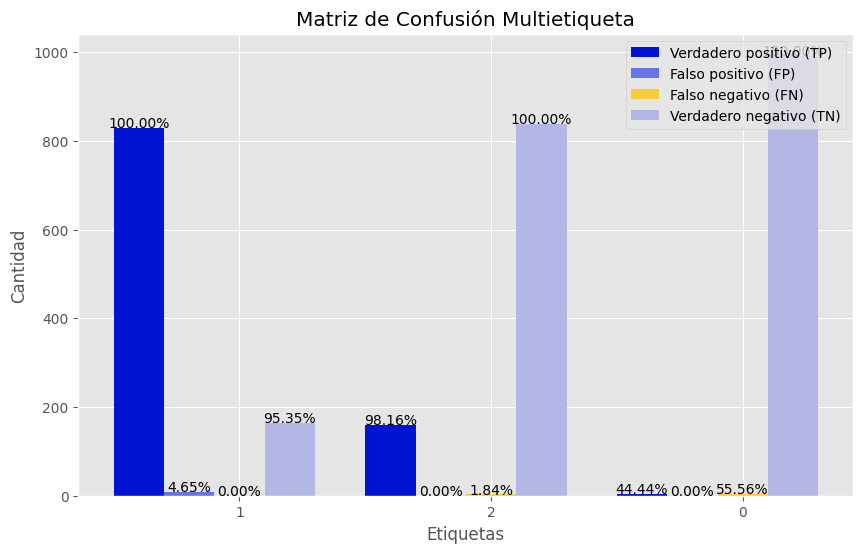

In [36]:
#obtenemos los valores de verdadero positivo (TP), falso positivo (FP), falso negativo (FN) y verdadero negativo (TN)
TP = mcm[:, 1, 1]
FP = mcm[:, 0, 1]
FN = mcm[:, 1, 0]
TN = mcm[:, 0, 0]

#calculamos la precisión, el porcentaje de verdaderos positivos y la tasa de error en porcentaje
accuracy = (TP + TN) / (TP + FP + FN + TN) * 100
precision = TP / (TP + FP) * 100
recall = TP / (TP + FN) * 100
f1_score = 2 * precision * recall / (precision + recall)
error_rate = (1 - accuracy) * 100

#adaptamos el color de la paleta a los colores corporativos de nuestro proyecto
colors = ['#0014D1', '#6773E4', '#F5CD3D', '#B3B7E5']

#gráfico de barras
labels = np.arange(len(y_unique))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels - 2 * width, TP, width, label='Verdadero positivo (TP)', color=colors[0])
ax.bar(labels - width, FP, width, label='Falso positivo (FP)', color=colors[1])
ax.bar(labels, FN, width, label='Falso negativo (FN)', color=colors[2])
ax.bar(labels + width, TN, width, label='Verdadero negativo (TN)', color=colors[3])

#agrega etiquetas con los valores en porcentaje
for i in range(len(labels)):
    ax.text(labels[i] - 2 * width, TP[i] + 1, f'{TP[i]/sum(y_test==y_unique[i])*100:.2f}%', ha='center')
    ax.text(labels[i] - width, FP[i] + 1, f'{FP[i]/sum(y_test!=y_unique[i])*100:.2f}%', ha='center')
    ax.text(labels[i], FN[i] + 1, f'{FN[i]/sum(y_test==y_unique[i])*100:.2f}%', ha='center')
    ax.text(labels[i] + width, TN[i] + 1, f'{TN[i]/sum(y_test!=y_unique[i])*100:.2f}%', ha='center')

ax.set_xlabel('Etiquetas')
ax.set_ylabel('Cantidad')
ax.set_title('Matriz de Confusión Multietiqueta')
ax.set_xticks(labels)
ax.set_xticklabels(y_unique)
ax.legend()

plt.show()